In [1]:
import re
import nltk
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\!admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\!admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\!admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = ("reddit.csv")
data.head()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


,Unnamed: 0,title,post
0,0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...
1,1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...
2,2,Games with great sound design,"We can all appreciate good sound, right? But w..."
3,3,Remedy to open a new studio in Sweden,NaN
4,4,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3631 entries, 0 to 3630
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3631 non-null   int64 
 1   title       3631 non-null   object
 2   post        1713 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.2+ KB


In [4]:
data.describe()

,Unnamed: 0
count,3631.000000
mean,456.322776
std,267.071134
min,0.000000
25%,226.500000
50%,453.000000
75%,680.000000
max,988.000000


In [11]:
df = data.drop(data.columns[0],axis=1)

In [12]:
#after doing some descriptive text analysis we want to generate topics based on the dataset title 
df.head()

,title,post
0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...
1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...
2,Games with great sound design,"We can all appreciate good sound, right? But w..."
3,Remedy to open a new studio in Sweden,NaN
4,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears..."


In [20]:
 #getting the length of each text in the
df['title_length'] = df['title'].apply(lambda x:len(x.split()))

average_words = df['title_length'].mean()

print(f'mean of the text words -> {average_words}')
df.head()
 

mean of the text words -> 11.994491875516387


,title,post,length,title_length
0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...,5,5
1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...,6,6
2,Games with great sound design,"We can all appreciate good sound, right? But w...",5,5
3,Remedy to open a new studio in Sweden,NaN,8,8
4,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears...",5,5


Text(0, 0.5, 'Count')

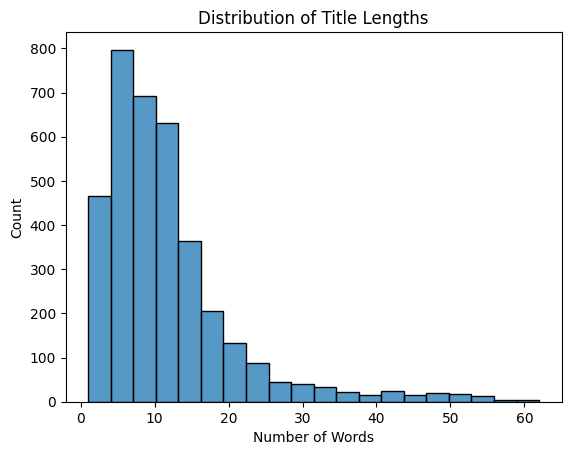

In [102]:
# Plot 1: Distribution of title lengths
plt.subplot(1, 1, 1)
sns.histplot(data=df['title_length'], bins=20)
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')

In [137]:
#preforming the necessary preporcessing steps
def tokenize_words(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Tokenize
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in tokens if word.isalpha() | word.isnumeric()  and word not in stop_words]
        return "  ".join(filtered_words)
    return []


df['tokenized_words'] = df['title'].apply(tokenize_words)
df.head()

,title,post,length,title_length,tokenized_words,topic_results,keywords
0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...,5,5,good military rpg,3,"[best, player, team, season, nba]"
1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...,6,6,fc 6 defeat admiral benitez broken,6,"[best, player, team, season, nba]"
2,Games with great sound design,"We can all appreciate good sound, right? But w...",5,5,games great sound design,2,"[best, player, team, season, nba]"
3,Remedy to open a new studio in Sweden,NaN,8,8,remedy open new studio sweden,5,"[games, switch, launch, game, trailer]"
4,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears...",5,5,need game recommendation,4,"[best, player, team, season, nba]"


Text(0.5, 0, 'Frequency')

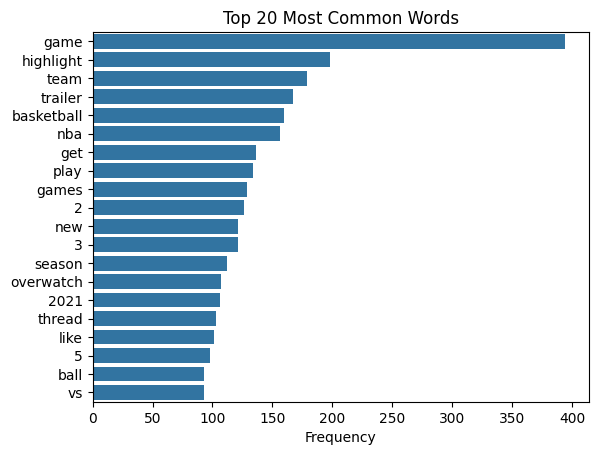

In [138]:
# Plot 3: Top 20 most common words
word_freq = Counter(" ".join(df['tokenized_words'].dropna()).split())
words, counts = zip(*word_freq.most_common(20))
plt.subplot(1, 1, 1)
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')

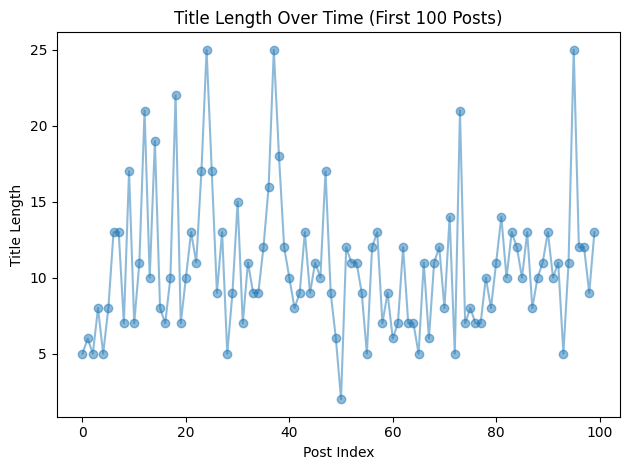

In [140]:
# Plot 4: Title length over time
plt.subplot(1, 1, 1)
plt.plot(df.index[:100], df['title_length'][:100], '-o', alpha=0.5)
plt.title('Title Length Over Time (First 100 Posts)')
plt.xlabel('Post Index')
plt.ylabel('Title Length')

plt.tight_layout()
plt.show()

In [141]:
#import and initailize the sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
#convert the words to vectors 
cv = CountVectorizer(min_df=2,max_df=0.9)
dtm = cv.fit_transform(df['tokenized_words'])

In [143]:
cv.get_feature_names_out()[-5:]

array(['zero', 'zion', 'zombie', 'zone', 'zubac'], dtype=object)

In [144]:
#using the latent dirichlet allocation to predict the topics
from sklearn.decomposition  import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7,random_state=42)



In [145]:
#splitting the dataset for testing and traingin
 
# y =  dtm
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [146]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [147]:
freq_key = []
for idx in df['topic_results']:
     topic = lda.components_[idx]
    #prediction of the topic words
     # print(f'THE TOP 5 WORDS FOR TOPIC #{idx}')
     # print([cv.get_feature_names()[i] for i in topic.argsort()[-5:]])
     freq_key.append([cv.get_feature_names()[i] for i in topic.argsort()[-5:]])

     

C:\Users\!admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [148]:
topic_result = lda.transform(dtm)

In [149]:
df['topic_results'] = topic_result.argmax(axis=1)

In [150]:
print(freq_key[:5])

[['know', 'best', 'games', 'nba', 'game'], ['overwatch', 'players', 'ball', 'play', 'highlight'], ['playing', 'like', 'team', 'overwatch', 'basketball'], ['better', 'switch', 'highlight', 'launch', 'trailer'], ['nba', 'back', 'lebron', 'world', 'team']]


In [151]:
df['keywords'] = freq_key

In [152]:
print(df['topic_results'].head())

0    5
1    4
2    2
3    0
4    1
Name: topic_results, dtype: int64


In [153]:
df.head(10)

,title,post,length,title_length,tokenized_words,topic_results,keywords
0,any good military text-based rpg?,Hey guys\n\nI used to play a game from Storm8 ...,5,5,good military rpg,5,"[know, best, games, nba, game]"
1,FC 6 Defeat Admiral Benitez BROKEN,In one try I fell trough a “floor” into broken...,6,6,fc 6 defeat admiral benitez broken,4,"[overwatch, players, ball, play, highlight]"
2,Games with great sound design,"We can all appreciate good sound, right? But w...",5,5,games great sound design,2,"[playing, like, team, overwatch, basketball]"
3,Remedy to open a new studio in Sweden,NaN,8,8,remedy open new studio sweden,0,"[better, switch, highlight, launch, trailer]"
4,I need a game recommendation,"Hi all,\n\nI'm 72, retired, and bored to tears...",5,5,need game recommendation,1,"[nba, back, lebron, world, team]"
5,Why did Valve made that terrible card game?,I like Valve since they usually do a good job ...,8,8,valve made terrible card game,1,"[full, got, vs, highlight, game]"
6,"Battlefield 2042 is removing a ""little green m...",NaN,13,13,battlefield 2042 removing little green me...,6,"[playing, like, team, overwatch, basketball]"
7,"""I Quit The Game Immediately"": Trans Players R...",NaN,13,13,quit game immediately trans players respo...,3,"[playing, like, team, overwatch, basketball]"
8,Starbreeze net sales up to almost $4m,NaN,7,7,starbreeze net sales almost,2,"[nba, back, lebron, world, team]"
9,Dragon Ball FighterZ surpasses 8 million units...,NaN,17,17,dragon ball fighterz surpasses 8 million ...,6,"[full, got, vs, highlight, game]"
